In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib.animation import FuncAnimation
from IPython.display import Video, HTML
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits import mplot3d

from skimage import io
from matplotlib import image as mpimg
from PIL import Image

import scipy.integrate as integrate
import scipy.special as special
from statistics import mean
import scipy.stats as stats
from scipy import signal

In [3]:
ADCP_0n78e_F = '~/NOAA Work/ADCP Data - Filled/adcp_0n78e_rm5.cdf'
ADCP_2 = xr.open_dataset(ADCP_0n78e_F) # O N, 78 E
ADCP_2 

<xarray.Dataset>
Dimensions:  (time: 4021, depth: 81, lat: 1, lon: 1)
Coordinates:
  * time     (time) datetime64[ns] 2008-08-09T12:00:00 ... 2019-08-12T12:00:00
  * depth    (depth) float32 0.0 5.0 10.0 15.0 20.0 ... 385.0 390.0 395.0 400.0
  * lat      (lat) float32 0.0
  * lon      (lon) float32 78.0
Data variables:
    u_1205   (time, depth, lat, lon) float32 ...
    v_1206   (time, depth, lat, lon) float32 ...
Attributes:
    CREATION_DATE:  13:58 13-JUN-2022

In [4]:
## These are Filled!
ADCP_0n80_5e_F = '~/NOAA Work/ADCP Data - Filled/adcp_0n80.5e_rm5.cdf'
ADCP_1 = xr.open_dataset(ADCP_0n80_5e_F) # O N, 80.5 E

ADCP_0n83e_F = '~/NOAA Work/ADCP Data - Filled/adcp_0n83e_rm5.cdf'
ADCP_4 = xr.open_dataset(ADCP_0n83e_F) # O N, 83 E

ADCP_0_75n80_5e_F = '~/NOAA Work/ADCP Data - Filled/adcp_0.75n80.5e_rm5.cdf'
ADCP_3 = xr.open_dataset(ADCP_0_75n80_5e_F) # O.75 N, 80.5 E

ADCP_0_75s80_5e_F = '~/NOAA Work/ADCP Data - Filled/adcp_0.75s80.5e_rm5.cdf'
ADCP_5 = xr.open_dataset(ADCP_0_75s80_5e_F) # O.75 S, 80.5 E

ADCP_1_5n80_5e_F = '~/NOAA Work/ADCP Data - Filled/adcp_1.5n80.5e_rm5.cdf'
ADCP_8 = xr.open_dataset(ADCP_1_5n80_5e_F) # 1.5 N, 80.5 E

ADCP_1_5s80_5e_F = '~/NOAA Work/ADCP Data - Filled/adcp_1.5s80.5e_rm5.cdf'
ADCP_6 = xr.open_dataset(ADCP_1_5s80_5e_F) # 1.5 S, 80.5 E

ADCP_2_5n_80_5e_F = '~/NOAA Work/ADCP Data - Filled/adcp_2.5n80.5e_rm5.cdf'
ADCP_9 = xr.open_dataset(ADCP_2_5n_80_5e_F) # 2.5 N, 80.5 E

ADCP_2_5s_80_5e_F = '~/NOAA Work/ADCP Data - Filled/adcp_2.5s80.5e_rm5.cdf'
ADCP_7 = xr.open_dataset(ADCP_2_5s_80_5e_F) # 2.5 S, 80.5 E

ADCP_4s_80_5e_F = '~/NOAA Work/ADCP Data - Filled/adcp_4s80.5e_rm5.cdf'
ADCP_10 = xr.open_dataset(ADCP_4s_80_5e_F) # 4 S, 80.5 E

ADCP_1

<xarray.Dataset>
Dimensions:  (time: 5404, depth: 84, lat: 1, lon: 1)
Coordinates:
  * time     (time) datetime64[ns] 2004-10-27T12:00:00 ... 2019-08-13T12:00:00
  * depth    (depth) float32 0.0 5.0 10.0 15.0 20.0 ... 400.0 405.0 410.0 415.0
  * lat      (lat) float32 0.0
  * lon      (lon) float32 80.5
Data variables:
    u_1205   (time, depth, lat, lon) float32 ...
    v_1206   (time, depth, lat, lon) float32 ...
Attributes:
    CREATION_DATE:  13:59 13-JUN-2022

In [5]:
## These are Unfilled!
ADCP_0_75n80_5e_U = '~/NOAA Work/ADCP Data - Unfilled/adcp0.75n80.5e_dy.cdf'
ADCP_3_U = xr.open_dataset(ADCP_0_75n80_5e_U) # O.75 N, 80.5 E

ADCP_0_75s80_5e_U = '~/NOAA Work/ADCP Data - Unfilled/adcp0.75s80.5e_dy.cdf'
ADCP_5_U = xr.open_dataset(ADCP_0_75s80_5e_U) # O.75 S, 80.5 E

ADCP_0n80_5e_U = '~/NOAA Work/ADCP Data - Unfilled/adcp0n80.5e_dy.cdf'
ADCP_1_U = xr.open_dataset(ADCP_0n80_5e_U) # O N, 80.5 E

ADCP_0n83e_F = '~/NOAA Work/ADCP Data - Unfilled/adcp0n83e_dy.cdf'
ADCP_4_U = xr.open_dataset(ADCP_0n83e_F) # O N, 83 E

ADCP_1_5n80_5e_U = '~/NOAA Work/ADCP Data - Unfilled/adcp1.5n80.5e_dy.cdf'
ADCP_8_U = xr.open_dataset(ADCP_1_5n80_5e_U) # 1.5 N, 80.5 E

ADCP_1_5s80_5e_U = '~/NOAA Work/ADCP Data - Unfilled/adcp1.5s80.5e_dy.cdf'
ADCP_6_U = xr.open_dataset(ADCP_1_5s80_5e_U) # 1.5 S, 80.5 E

ADCP_2_5n_80_5e_U = '~/NOAA Work/ADCP Data - Unfilled/adcp2.5n80.5e_dy.cdf'
ADCP_9_U = xr.open_dataset(ADCP_2_5n_80_5e_U) # 2.5 N, 80.5 E

ADCP_2_5s_80_5e_F = '~/NOAA Work/ADCP Data - Unfilled/adcp2.5s80.5e_dy.cdf'
ADCP_7_U = xr.open_dataset(ADCP_2_5s_80_5e_F) # 2.5 S, 80.5 E

ADCP_4s_80_5e_U = '~/NOAA Work/ADCP Data - Unfilled/adcp4s80.5e_dy.cdf'
ADCP_10_U = xr.open_dataset(ADCP_4s_80_5e_U) # 4 S, 80.5 E

ADCP_0n78e_U = '~/NOAA Work/ADCP Data - Unfilled/adcp0n78e_dy.cdf'
ADCP_2_U = xr.open_dataset(ADCP_0n78e_U) # 0 N, 78 E

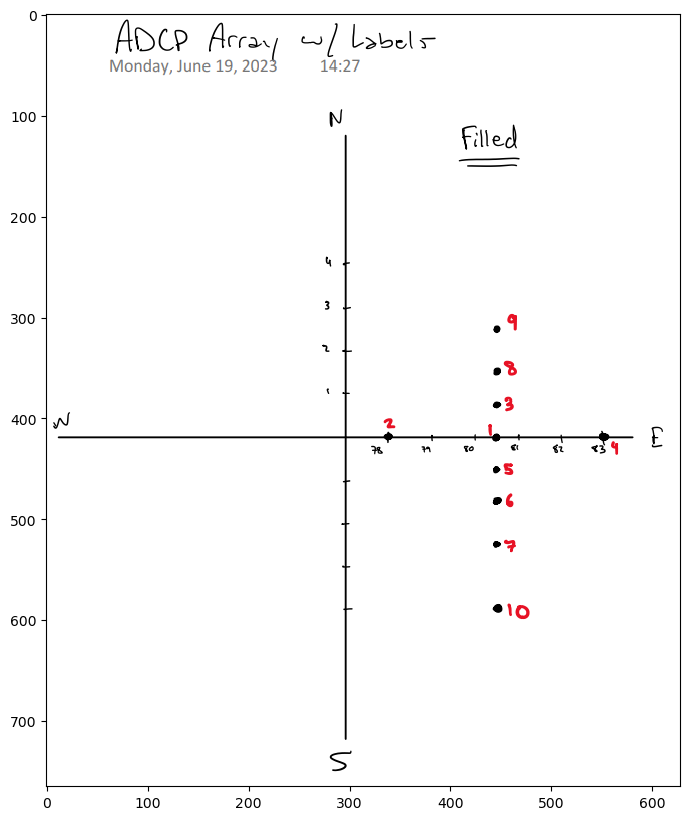

In [6]:
# ADCP Config with labels:
plt.figure(figsize = (7,10))
img = io.imread('~/NOAA Work/Images/ADCP_Config.PNG')
io.imshow(img)


Text(0.5, 0, 'Date')

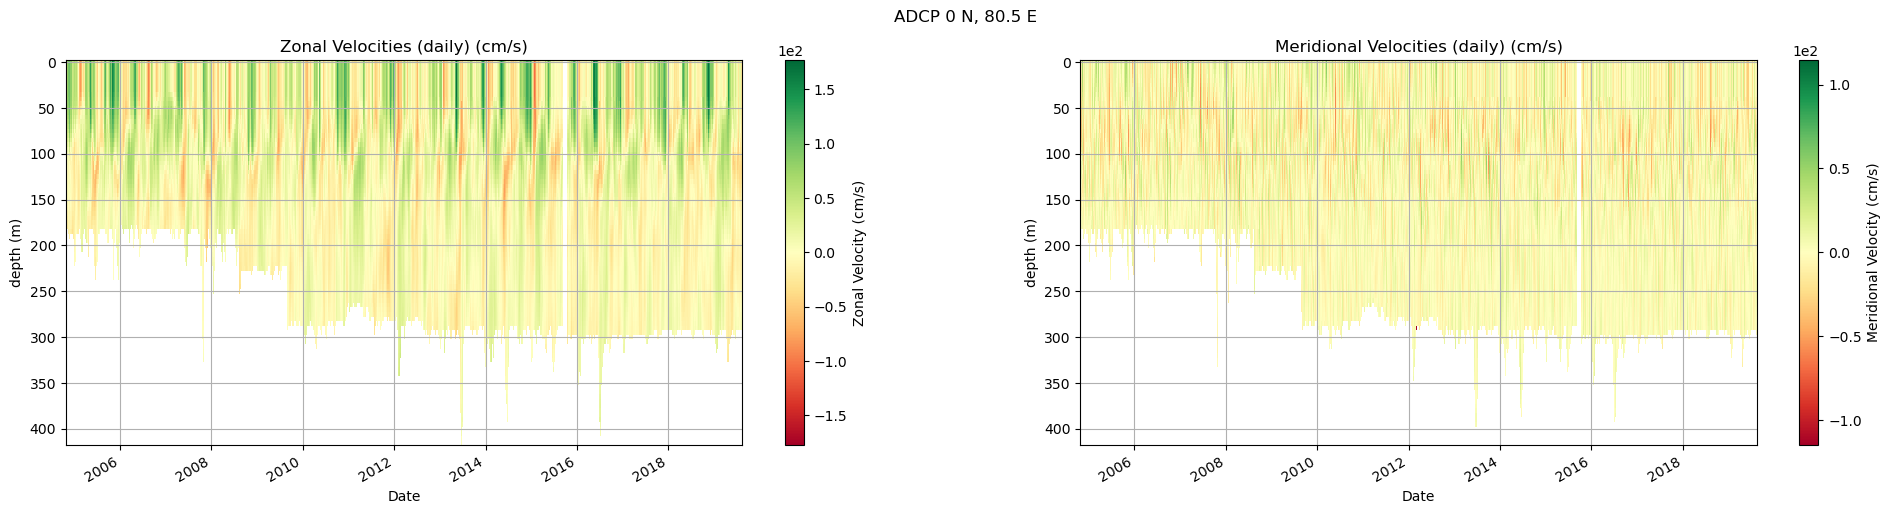

In [7]:
u_1 = ADCP_1.isel(lat = 0, lon = 0)['u_1205']
v_1 = ADCP_1.isel(lat = 0, lon = 0)['v_1206']
# for i in range(len(u_1)):
#     if u_1[i] == 1e35:
#         u_1[i] = 0
u_1 = xr.where(u_1 == 1e35, np.NaN, u_1)
v_1 = xr.where(v_1 == 1e35, np.NaN, v_1)

plt.figure(figsize = (24,5))
plt.subplot(1, 2, 1)
u_1.plot(x = 'time', y = 'depth', label = 'Zonal Velocity (cm/s)', cmap = 'RdYlGn')
plt.gca().invert_yaxis()
plt.ylabel('depth (m)')
plt.grid()
plt.title('Zonal Velocities (daily) (cm/s)')
ax = plt.gca()
cb = ax.collections[-1].colorbar
cb.set_label('Zonal Velocity (cm/s)')
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()
plt.xlabel('Date')
plt.subplot(1, 2, 2)
v_1.plot(x = 'time', y = 'depth', label = 'Meridional Velocity (cm/s)', cmap = 'RdYlGn')
plt.gca().invert_yaxis()
# u_1.plot(x = 'time', y = 'depth', label = 'Zonal Velocity (cm/s)', cmap = 'RdYlGn')
# plt.gca().invert_yaxis()
# v_1.plot(x = 'time', y = 'depth', label = 'Meridional Velocity (cm/s)', cmap = 'RdYlGn')
plt.ylabel('depth (m)')
plt.grid()
plt.title('Meridional Velocities (daily) (cm/s)')
plt.suptitle('ADCP 0 N, 80.5 E')
ax = plt.gca()
cb = ax.collections[-1].colorbar
cb.set_label('Meridional Velocity (cm/s)')
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()
plt.xlabel('Date')

In [8]:
u_2 = ADCP_2.isel(lat = 0, lon = 0)['u_1205']
v_2 = ADCP_2.isel(lat = 0, lon = 0)['v_1206']
u_2 = xr.where(u_2 == 1e35, np.NaN, u_2)
v_2 = xr.where(v_2 == 1e35, np.NaN, v_2)
u_2 = u_2[:, 0:41]

u_3 = ADCP_3.isel(lat = 0, lon = 0)['u_1205']
v_3 = ADCP_3.isel(lat = 0, lon = 0)['v_1206']
u_3 = xr.where(u_3 == 1e35, np.NaN, u_3)
v_3 = xr.where(v_3 == 1e35, np.NaN, v_3)

u_4 = ADCP_4.isel(lat = 0, lon = 0)['u_1205']
v_4 = ADCP_4.isel(lat = 0, lon = 0)['v_1206']
u_4 = xr.where(u_4 == 1e35, np.NaN, u_4)
v_4 = xr.where(v_4 == 1e35, np.NaN, v_4)

u_5 = ADCP_5.isel(lat = 0, lon = 0)['u_1205']
v_5 = ADCP_5.isel(lat = 0, lon = 0)['v_1206']
u_5 = xr.where(u_5 == 1e35, np.NaN, u_5)
v_5 = xr.where(v_5 == 1e35, np.NaN, v_5)

u_6 = ADCP_6.isel(lat = 0, lon = 0)['u_1205']
v_6 = ADCP_6.isel(lat = 0, lon = 0)['v_1206']
u_6 = xr.where(u_6 == 1e35, np.NaN, u_6)
v_6 = xr.where(v_6 == 1e35, np.NaN, v_6)

u_7 = ADCP_7.isel(lat = 0, lon = 0)['u_1205']
v_7 = ADCP_7.isel(lat = 0, lon = 0)['v_1206']
u_7 = xr.where(u_7 == 1e35, np.NaN, u_7)
v_7 = xr.where(v_7 == 1e35, np.NaN, v_7)

u_8 = ADCP_8.isel(lat = 0, lon = 0)['u_1205']
v_8 = ADCP_8.isel(lat = 0, lon = 0)['v_1206']
u_8 = xr.where(u_8 == 1e35, np.NaN, u_8)
v_8 = xr.where(v_8 == 1e35, np.NaN, v_8)

u_9 = ADCP_9.isel(lat = 0, lon = 0)['u_1205']
v_9 = ADCP_9.isel(lat = 0, lon = 0)['v_1206']
u_9 = xr.where(u_9 == 1e35, np.NaN, u_9)
v_9 = xr.where(v_9 == 1e35, np.NaN, v_9)

Text(0.5, 0, 'Date')

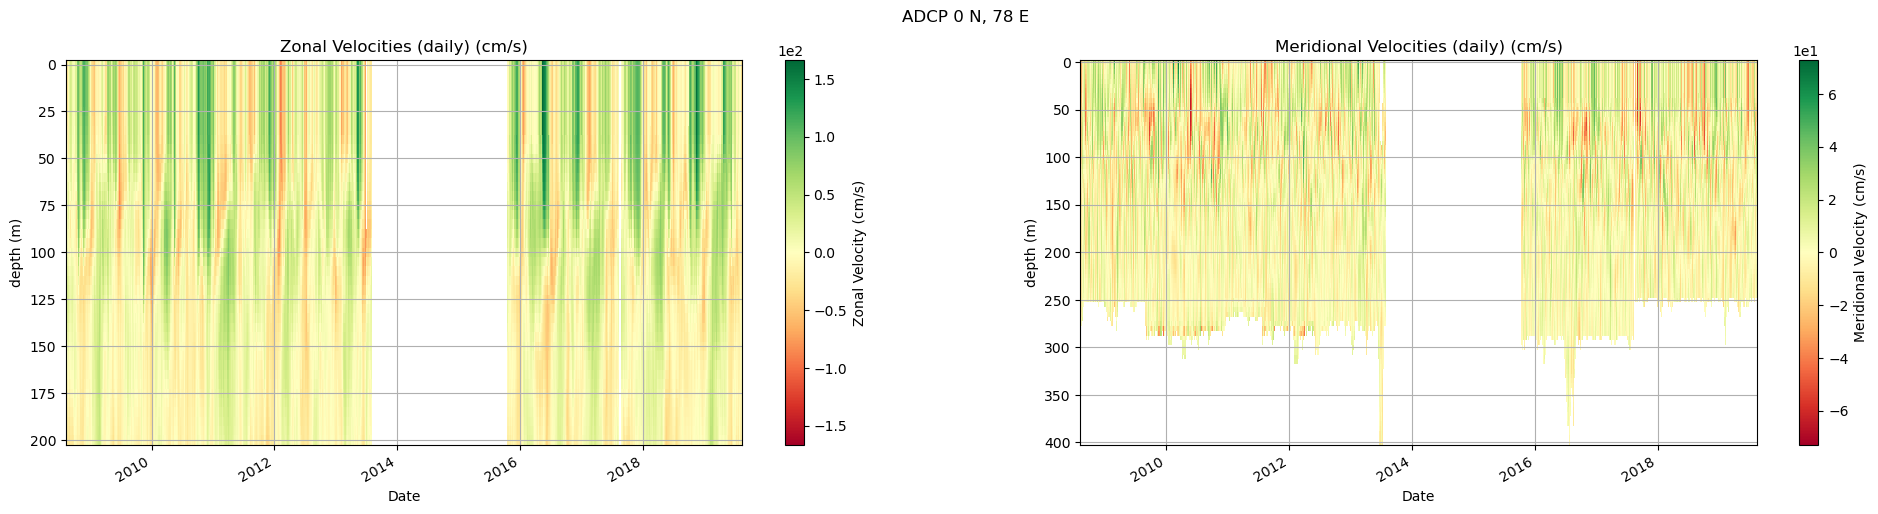

In [9]:
plt.figure(figsize = (24,5))
plt.subplot(1, 2, 1)
u_2.plot(x = 'time', y = 'depth', label = 'Zonal Velocity (cm/s)', cmap = 'RdYlGn')
plt.gca().invert_yaxis()
plt.ylabel('depth (m)')
plt.grid()
plt.title('Zonal Velocities (daily) (cm/s)')
ax = plt.gca()
cb = ax.collections[-1].colorbar
cb.set_label('Zonal Velocity (cm/s)')
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()
plt.xlabel('Date')
plt.subplot(1, 2, 2)
v_2.plot(x = 'time', y = 'depth', label = 'Meridional Velocity (cm/s)', cmap = 'RdYlGn')
plt.gca().invert_yaxis()
plt.ylabel('depth (m)')
plt.grid()
plt.title('Meridional Velocities (daily) (cm/s)')
plt.suptitle('ADCP 0 N, 78 E')
ax = plt.gca()
cb = ax.collections[-1].colorbar
cb.set_label('Meridional Velocity (cm/s)')
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()
plt.xlabel('Date')

Text(0.5, 0, 'Date')

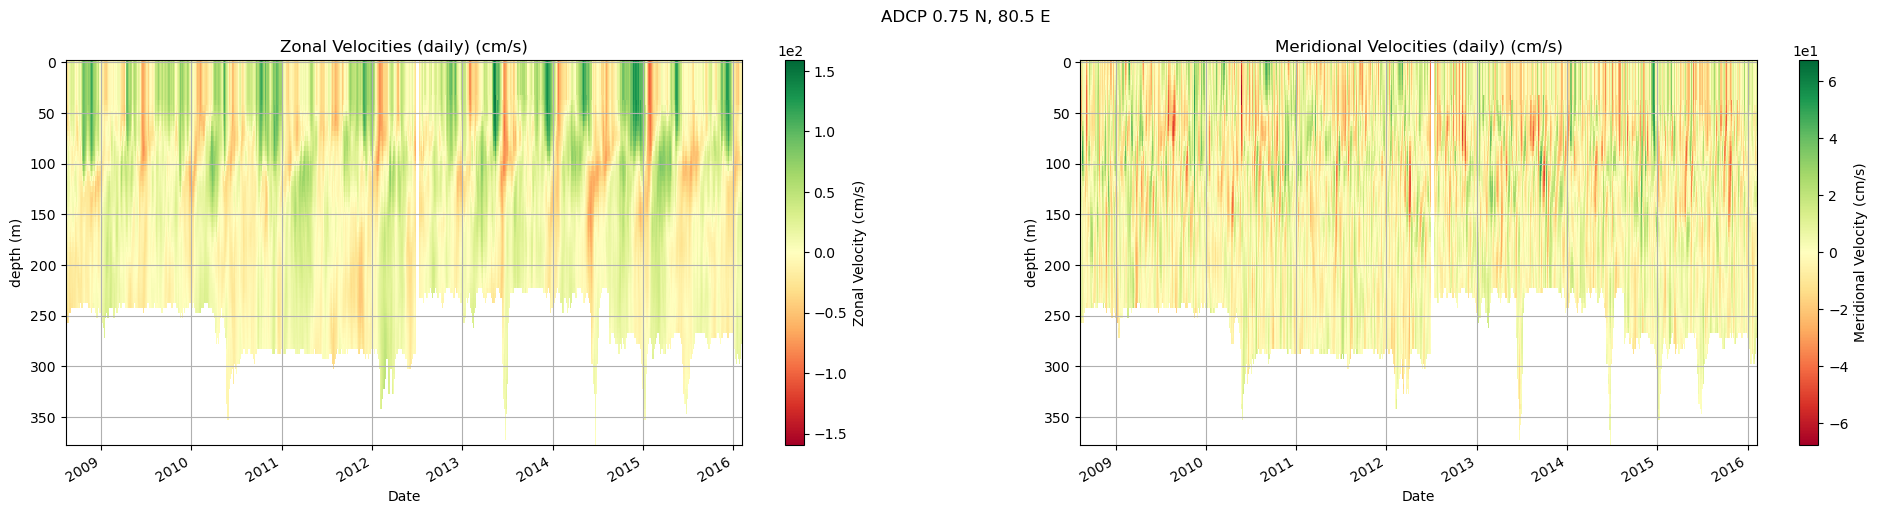

In [10]:
plt.figure(figsize = (24,5))
plt.subplot(1, 2, 1)
u_3.plot(x = 'time', y = 'depth', label = 'Zonal Velocity (cm/s)', cmap = 'RdYlGn')
plt.gca().invert_yaxis()
plt.ylabel('depth (m)')
plt.grid()
plt.title('Zonal Velocities (daily) (cm/s)')
ax = plt.gca()
cb = ax.collections[-1].colorbar
cb.set_label('Zonal Velocity (cm/s)')
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()
plt.xlabel('Date')
plt.subplot(1, 2, 2)
v_3.plot(x = 'time', y = 'depth', label = 'Meridional Velocity (cm/s)', cmap = 'RdYlGn')
plt.gca().invert_yaxis()
plt.ylabel('depth (m)')
plt.grid()
plt.title('Meridional Velocities (daily) (cm/s)')
plt.suptitle('ADCP 0.75 N, 80.5 E')
ax = plt.gca()
cb = ax.collections[-1].colorbar
cb.set_label('Meridional Velocity (cm/s)')
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()
plt.xlabel('Date')

Text(0.5, 0, 'Date')

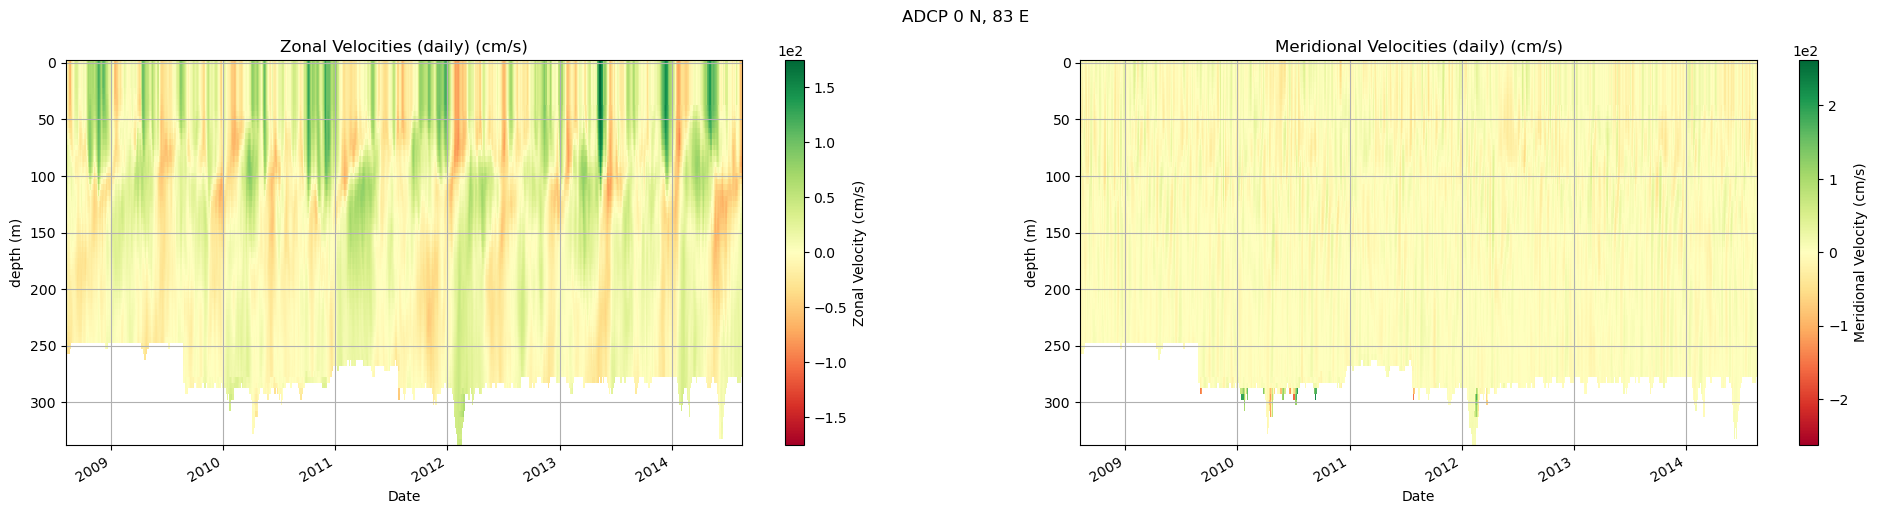

In [11]:
plt.figure(figsize = (24,5))
plt.subplot(1, 2, 1)
u_4.plot(x = 'time', y = 'depth', label = 'Zonal Velocity (cm/s)', cmap = 'RdYlGn')
plt.gca().invert_yaxis()
plt.ylabel('depth (m)')
plt.grid()
plt.title('Zonal Velocities (daily) (cm/s)')
ax = plt.gca()
cb = ax.collections[-1].colorbar
cb.set_label('Zonal Velocity (cm/s)')
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()
plt.xlabel('Date')
plt.subplot(1, 2, 2)
v_4.plot(x = 'time', y = 'depth', label = 'Meridional Velocity (cm/s)', cmap = 'RdYlGn')
plt.gca().invert_yaxis()
plt.ylabel('depth (m)')
plt.grid()
plt.title('Meridional Velocities (daily) (cm/s)')
plt.suptitle('ADCP 0 N, 83 E')
ax = plt.gca()
cb = ax.collections[-1].colorbar
cb.set_label('Meridional Velocity (cm/s)')
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()
plt.xlabel('Date')

Text(0.5, 0, 'Date')

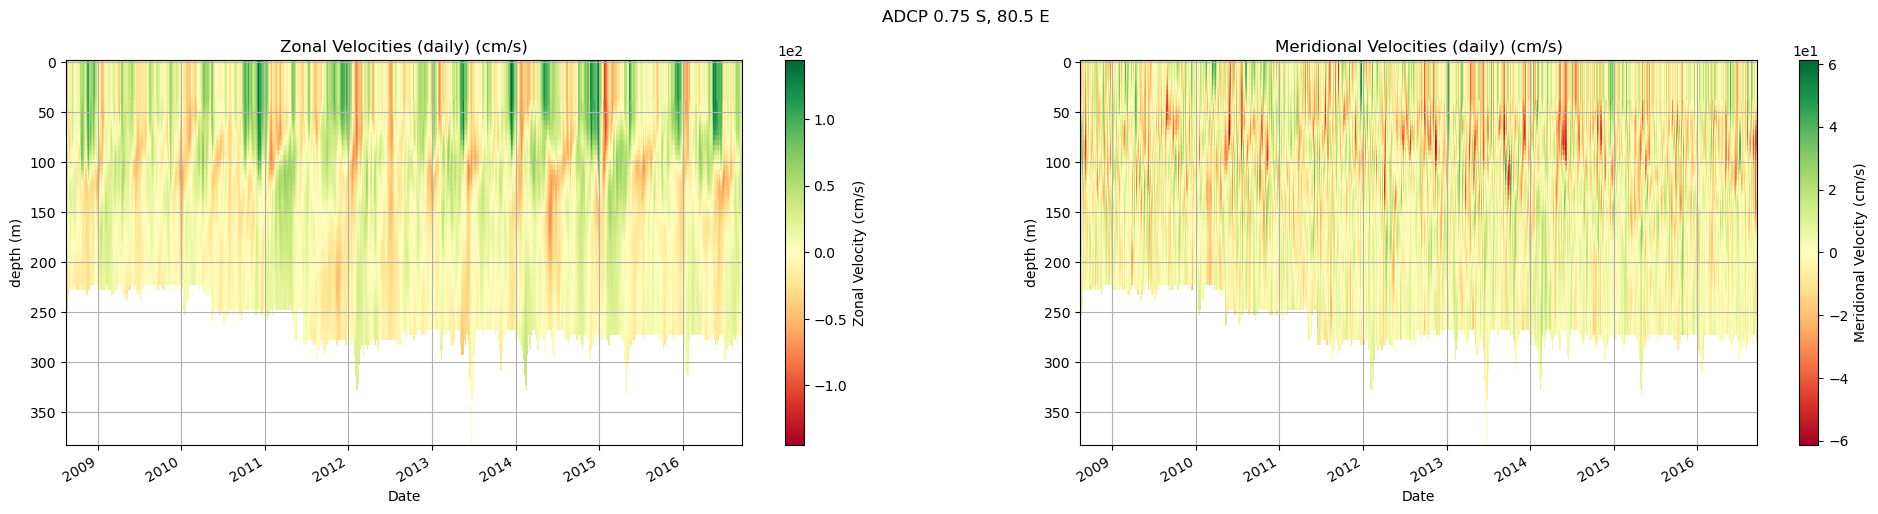

In [12]:
plt.figure(figsize = (24,5))
plt.subplot(1, 2, 1)
u_5.plot(x = 'time', y = 'depth', label = 'Zonal Velocity (cm/s)', cmap = 'RdYlGn')
plt.gca().invert_yaxis()
plt.ylabel('depth (m)')
plt.grid()
plt.title('Zonal Velocities (daily) (cm/s)')
ax = plt.gca()
cb = ax.collections[-1].colorbar
cb.set_label('Zonal Velocity (cm/s)')
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()
plt.xlabel('Date')
plt.subplot(1, 2, 2)
v_5.plot(x = 'time', y = 'depth', label = 'Meridional Velocity (cm/s)', cmap = 'RdYlGn')
plt.gca().invert_yaxis()
plt.ylabel('depth (m)')
plt.grid()
plt.title('Meridional Velocities (daily) (cm/s)')
plt.suptitle('ADCP 0.75 S, 80.5 E')
ax = plt.gca()
cb = ax.collections[-1].colorbar
cb.set_label('Meridional Velocity (cm/s)')
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()
plt.xlabel('Date')

In [13]:
u_1 = u_1[:, 0:41]
v_1 = v_1[:, 0:41]

u_2 = u_2[:, 0:41]
v_2 = v_2[:, 0:41]

u_3 = u_3[:, 0:41]
v_3 = v_3[:, 0:41]

u_4 = u_4[:, 0:41]
v_4 = v_4[:, 0:41]

u_5 = u_5[:, 0:41]
v_5 = v_5[:, 0:41]

u_6 = u_6[:, 0:41]
v_6 = v_6[:, 0:41]

u_7 = u_7[:, 0:41]
v_7 = v_7[:, 0:41]

u_8 = u_8[:, 0:41]
v_8 = v_8[:, 0:41]

u_9 = u_9[:, 0:41]
v_9 = v_9[:, 0:41]

In [14]:
u_4[6, 1]

<xarray.DataArray 'u_1205' ()>
array(-16.609129, dtype=float32)
Coordinates:
    time     datetime64[ns] 2008-08-14T12:00:00
    depth    float32 5.0
    lat      float32 0.0
    lon      float32 83.0

In [15]:
# In case take mean before calcs: 
# u_1 = u_1.rolling(time =1, center=True).mean()
# plt.figure(figsize = (10,4))
# u_1.plot(x = 'time', y = 'depth')
# plt.gca().invert_yaxis()
# plt.ylabel('depth (m)')
# plt.grid()
# plt.title('Daily averaged Zonal Velocity (cm/s)')


Text(0.5, 0, 'Date')

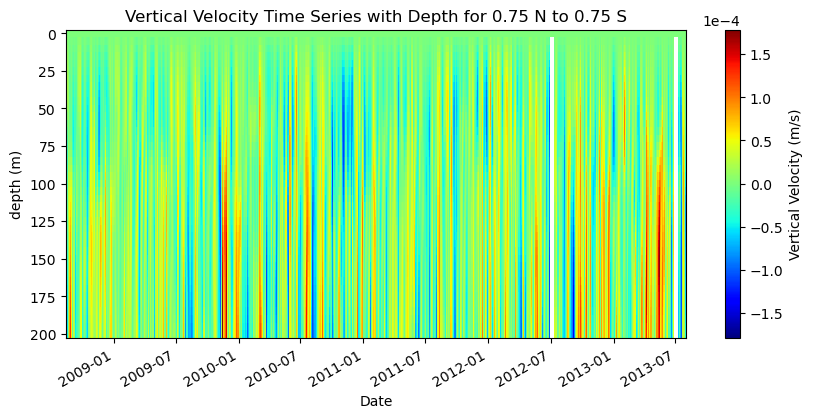

In [91]:
du = (u_4 - u_2) / 55600000    # Do I want daily averaged values before I integrate (with u and v) or after (with w values)
dv_75 = (v_3 - v_5) / 16700000 
func = du + dv_75
z = func['depth']
t = func['time']

from scipy.integrate import trapz
w_1 = integrate.cumtrapz(func, z, initial=0)
plt.figure(figsize = (10,4))
w_1 = xr.DataArray(w_1, coords=func.coords, dims=func.dims, attrs=func.attrs)
w_1.plot(x = 'time', y = 'depth', cmap = 'jet')
plt.gca().invert_yaxis()
plt.ylabel('depth (m)')
plt.xlim(w_1['time'][0], w_1['time'][1812])
plt.title('Vertical Velocity Time Series with Depth for 0.75 N to 0.75 S')
ax = plt.gca()
cb = ax.collections[-1].colorbar
cb.set_label('Vertical Velocity (m/s)')
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()
plt.xlabel('Date')

Text(0.5, 0, 'Date')

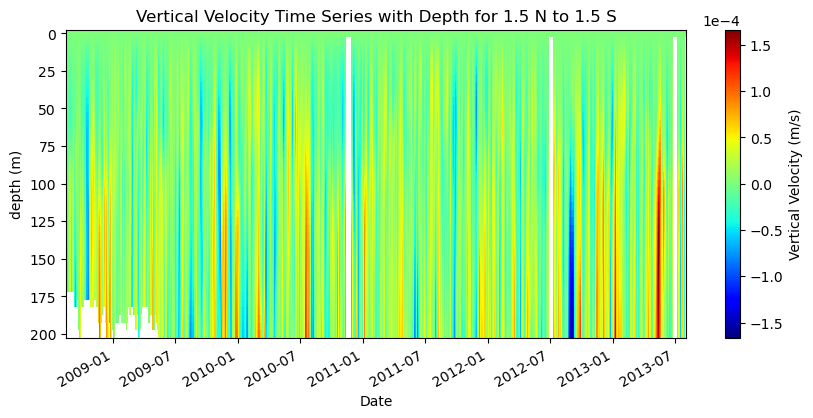

In [92]:
dv_15 = (v_8 - v_6) / 33300000 
func = du + dv_15
z = func['depth']
t = func['time']

w_2 = integrate.cumtrapz(func, z, initial=0)
plt.figure(figsize = (10,4))
w_2 = xr.DataArray(w_2, coords=func.coords, dims=func.dims, attrs=func.attrs)
w_2.plot(x = 'time', y = 'depth', cmap = 'jet')
plt.gca().invert_yaxis()
plt.ylabel('depth (m)')
plt.xlim(w_2['time'][0], w_2['time'][1812])
plt.title('Vertical Velocity Time Series with Depth for 1.5 N to 1.5 S')
ax = plt.gca()
cb = ax.collections[-1].colorbar
cb.set_label('Vertical Velocity (m/s)')
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()
plt.xlabel('Date')

Text(0.5, 0, 'Date')

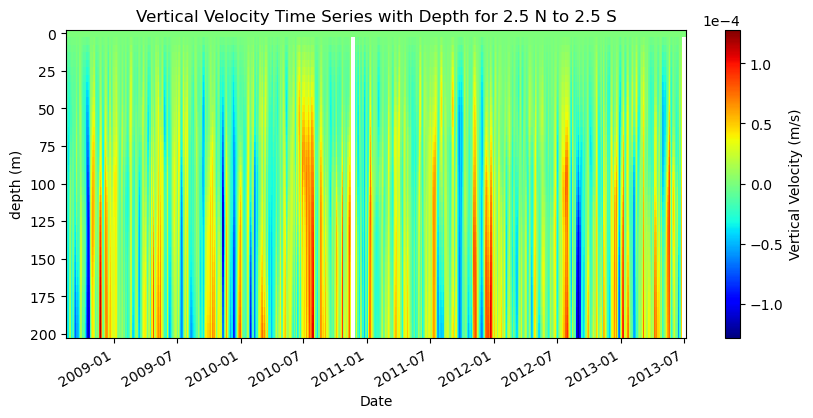

In [93]:
dv_25 = (v_9 - v_7) / 55600000 
func = du + dv_25
z = func['depth']
t = func['time']

w_3 = integrate.cumtrapz(func, z, initial=0)
plt.figure(figsize = (10,4))
w_3 = xr.DataArray(w_3, coords=func.coords, dims=func.dims, attrs=func.attrs)
w_3.plot(x = 'time', y = 'depth', cmap = 'jet')
plt.gca().invert_yaxis()
plt.ylabel('depth (m)')
# plt.xlim(w_3['time'][0], w_3['time'][1812])
plt.title('Vertical Velocity Time Series with Depth for 2.5 N to 2.5 S')
ax = plt.gca()
cb = ax.collections[-1].colorbar
cb.set_label('Vertical Velocity (m/s)')
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()
plt.xlabel('Date')

In [46]:
w_1[1812]

<xarray.DataArray (depth: 41)>
array([ 0., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan])
Coordinates:
    time     datetime64[ns] 2013-07-31T12:00:00
  * depth    (depth) float32 0.0 5.0 10.0 15.0 20.0 ... 185.0 190.0 195.0 200.0
    lat      float32 0.0
    lon      float32 80.5

In [17]:
# A = w_1.loc[:, 200]
# for i in range(len(A)):
#     print(i)
#     print(A[i])
    
# goes bad at iteration 1812, 2013-07-31T12:00:00

In [16]:
w_1_m = w_1.groupby('depth').mean('time')

In [70]:
w_2_m = w_2.groupby('depth').mean('time')
w_3_m = w_3.groupby('depth').mean('time')

Text(0.5, 1.0, 'Comparison of Vertical Velocities Based on Different latitudinal Moorings')

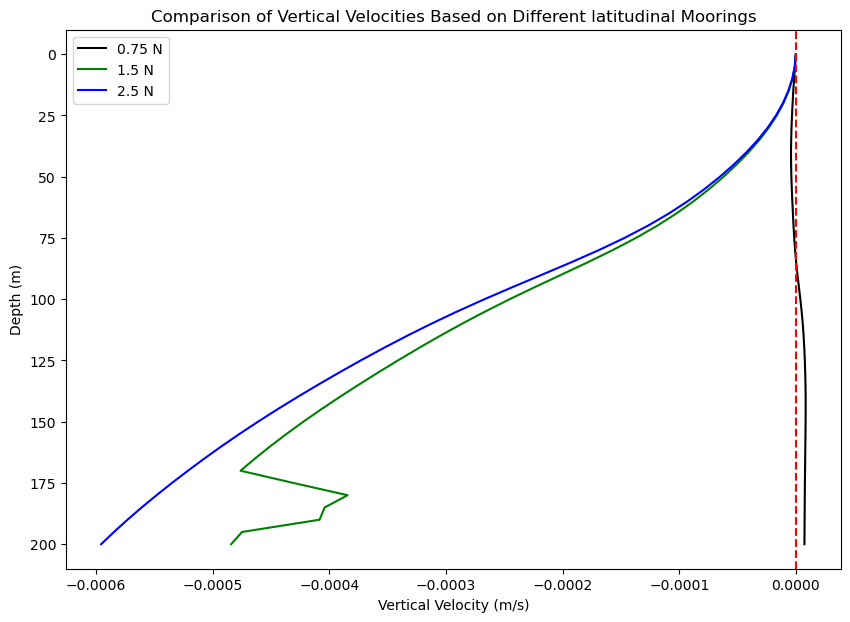

In [87]:
fig, ax = plt.subplots(figsize = (10,7))
plt.plot(w_1_m, w_1_m['depth'], color = 'k', label = '0.75 N')
plt.plot(w_2_m, w_2_m['depth'], color = 'g', label = '1.5 N')
plt.plot(w_3_m, w_3_m['depth'], color = 'b', label = '2.5 N')
plt.gca().invert_yaxis()
plt.axvline(x = 0, color = 'r', linestyle = '--')
plt.legend()
plt.xlabel('Vertical Velocity (m/s)')
plt.ylabel('Depth (m)')
plt.title('Comparison of Vertical Velocities Based on Different latitudinal Moorings')

# Could this be because of different dividends of v in each dv value?

In [17]:
ci = 1.96 * np.std(w_1_m)/np.sqrt(len(w_1_m['depth']))

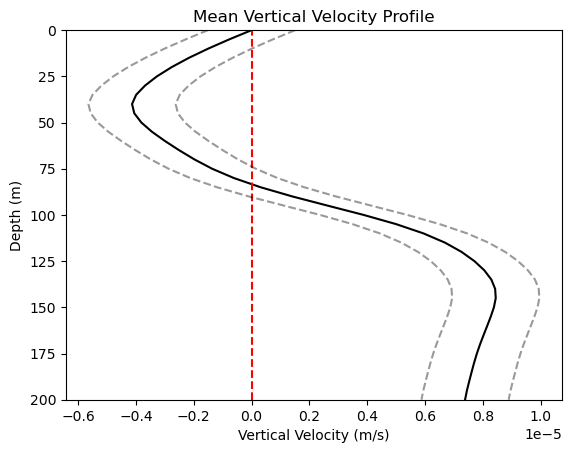

In [83]:
fig, ax = plt.subplots()
plt.plot(w_1_m, w_1_m['depth'], color = 'k')
plt.axvline(x = 0, color = 'r', linestyle = '--')
plt.ylim(0, 200)
plt.gca().invert_yaxis()
plt.title('Mean Vertical Velocity Profile')
plt.ylabel('Depth (m)')
#ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
plt.xlabel('Vertical Velocity (m/s)')
#ax.xaxis.set_label_position('top')
plt.plot((w_1_m + ci), w_1_m['depth'], color = 'k', ls = '--', alpha = 0.4)
plt.plot((w_1_m - ci), w_1_m['depth'], color = 'k', ls = '--', alpha = 0.4)
plt.savefig('Mean_Vertical_Velocity_Profile.pdf')

Text(0.5, 0, 'Date')

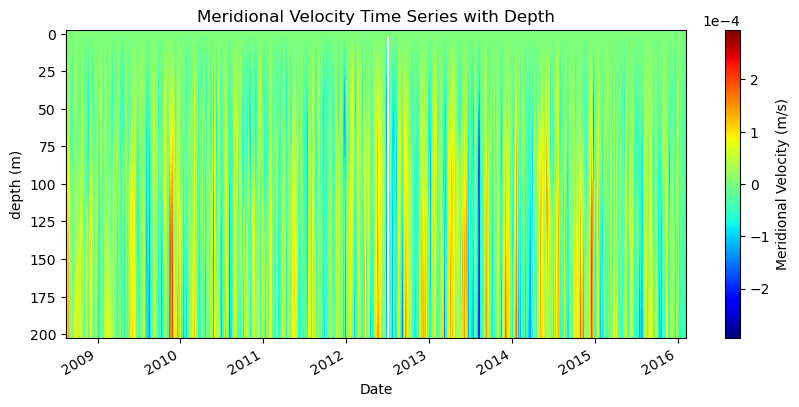

In [88]:
dv_75 = (v_3 - v_5) / 16700000
dv_75_i = dv_75
dv_75 = integrate.cumtrapz(dv_75, dv_75['depth'], initial=0)
dv_75 = xr.DataArray(dv_75, coords=dv_75_i.coords, dims=dv_75_i.dims, attrs=dv_75_i.attrs)
plt.figure(figsize = (10,4))
dv_75.plot(x = 'time', y = 'depth', cmap = 'jet')
plt.gca().invert_yaxis()
plt.ylabel('depth (m)')
#plt.xlim(dv_75['time'][0], dv_75['time'][1812])
plt.title('Meridional Velocity Time Series with Depth')
ax = plt.gca()
cb = ax.collections[-1].colorbar
cb.set_label('Meridional Velocity (m/s)')
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()
plt.xlabel('Date')

Text(0.5, 0, 'Date')

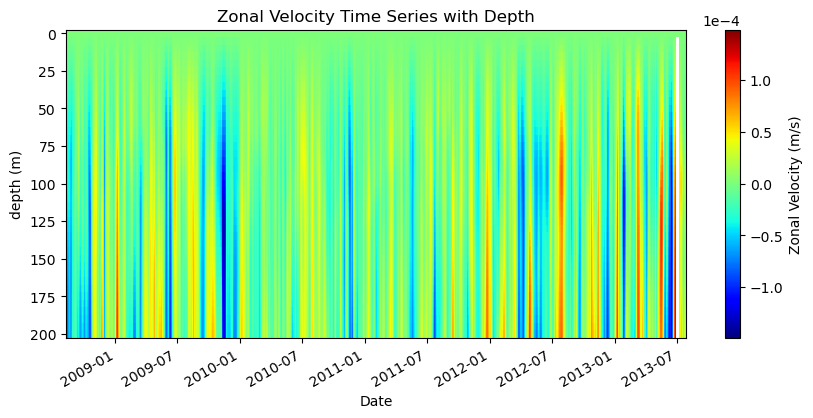

In [89]:
du = (u_4 - u_2) / 55600000
du_i = du
du = integrate.cumtrapz(du, du['depth'], initial=0)
du = xr.DataArray(du, coords=du_i.coords, dims=du_i.dims, attrs=du_i.attrs)
plt.figure(figsize = (10,4))
du.plot(x = 'time', y = 'depth', cmap = 'jet')
plt.gca().invert_yaxis()
plt.ylabel('depth (m)')
plt.xlim(du['time'][0], du['time'][1812])
plt.title('Zonal Velocity Time Series with Depth')
ax = plt.gca()
cb = ax.collections[-1].colorbar
cb.set_label('Zonal Velocity (m/s)')
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()
plt.xlabel('Date')


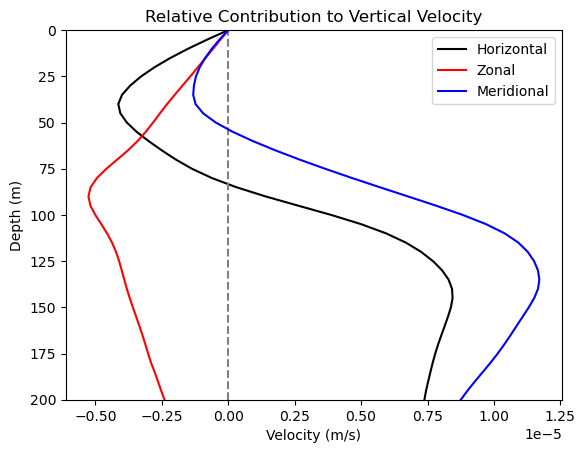

In [90]:
fig, ax = plt.subplots()
plt.plot(w_1_m, w_1_m['depth'], color = 'k', label = 'Horizontal')
plt.axvline(x = 0, color = 'grey', linestyle = '--')
plt.ylim(0, 200)
plt.gca().invert_yaxis()
plt.title('Relative Contribution to Vertical Velocity')
plt.ylabel('Depth (m)')
#ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
plt.xlabel('Velocity (m/s)')
#ax.xaxis.set_label_position('top')
du_m = du.groupby('depth').mean('time')
dv_75_m = dv_75.groupby('depth').mean('time')
plt.plot(du_m, du_m['depth'], color = 'r', label = 'Zonal')
plt.plot(dv_75_m, dv_75_m['depth'], color = 'b', label = 'Meridional')
plt.legend()
plt.savefig('Relative_Contributions.pdf')

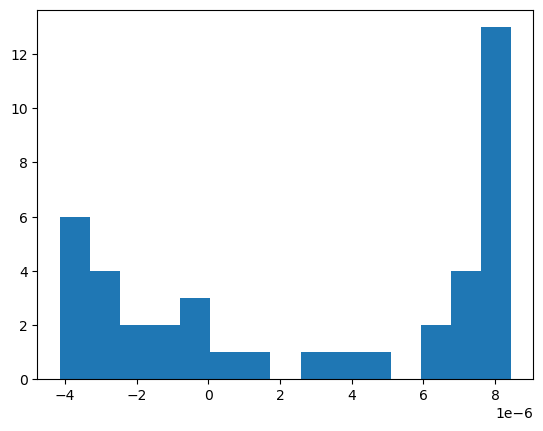

In [24]:
plt.hist(w_1_m, bins = 15)
plt.show()

In [36]:
%store -r dataset
tauxd = dataset
tau_x = tauxd['taux']

In [37]:
tau_x

<xarray.DataArray 'taux' (time: 1826, latitude: 60, longitude: 350)>
array([[[        nan, -0.01931152, -0.01732698, ...,         nan,
                 nan,         nan],
        [        nan,         nan, -0.0080912 , ...,         nan,
                 nan,         nan],
        [        nan,         nan, -0.00987169, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan, -0.05232012, -0.05317258, ...,         nan,
                 nan,         nan],
        [        nan,         nan, -0.03535108, ...,         nan,
                 nan,         nan],
        [        nan,         nan, -0.01586817, ...,         nan,
                 nan,         nan],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan, -0.00407843, -0.0041617 , ...,         nan,
                 nan,         nan],
        [        nan,         nan, -0.00089163, ...,         nan,
                 nan,         nan],
        [        nan,         nan, -0.00808617, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 30.5 31.5 32.5 33.5 ... 377.5 378.5 379.5
  * latitude   (latitude) float32 -29.5 -28.5 -27.5 -26.5 ... 27.5 28.5 29.5
  * time       (time) datetime64[ns] 2009-01-01T11:59:59.999959808 ... 2013-1...

In [47]:
w_1_0 = w_1.sortby("time")
w_1_0 = w_1_0.sel(time=slice("2009-01-01", "2013-07-31"))

In [48]:
w_1_0

<xarray.DataArray (time: 1673, depth: 41)>
array([[ 0.00000000e+00, -2.55806311e-06, -5.07485639e-06, ...,
        -1.80693082e-05, -1.87233206e-05, -2.00240453e-05],
       [ 0.00000000e+00, -2.25174917e-06, -4.45381462e-06, ...,
        -5.99518176e-06, -6.96757845e-06, -8.55159404e-06],
       [ 0.00000000e+00,  2.83315358e-07,  4.66883378e-07, ...,
         1.94601241e-06,  9.97896069e-07, -4.95661843e-07],
       ...,
       [ 0.00000000e+00, -1.01426657e-06, -2.02853314e-06, ...,
        -2.75588720e-05, -2.42901628e-05, -2.11784937e-05],
       [ 0.00000000e+00, -1.11775611e-06, -2.23551222e-06, ...,
        -4.82240818e-05, -4.49663649e-05, -4.18184702e-05],
       [ 0.00000000e+00,             nan,             nan, ...,
                    nan,             nan,             nan]])
Coordinates:
  * time     (time) datetime64[ns] 2009-01-01T12:00:00 ... 2013-07-31T12:00:00
  * depth    (depth) float32 0.0 5.0 10.0 15.0 20.0 ... 185.0 190.0 195.0 200.0
    lat      float32 0.0
    lon      float32 80.5

In [49]:
w_trial = w_1_0[:, 8]
tau_x0 = tau_x.isel(longitude = 50, latitude = 30)
tau_x0 = tau_x0.sel(time = slice("2009-01-01", "2013-07-31"))

In [50]:
tau_x0

<xarray.DataArray 'taux' (time: 1673)>
array([-0.00189863, -0.00322424, -0.008181  , ...,  0.00361118,
        0.05213861,  0.0157047 ], dtype=float32)
Coordinates:
    longitude  float32 80.5
    latitude   float32 0.5
  * time       (time) datetime64[ns] 2009-01-01T11:59:59.999959808 ... 2013-0...

In [60]:
import statsmodels.api as sm
corr = sm.tsa.stattools.ccf(tau_x0, w_trial, adjusted = True, fft = True)
corr

array([nan, nan, nan, ..., nan, nan, nan])

ValueError: correlate2d inputs must both be 2-D arrays

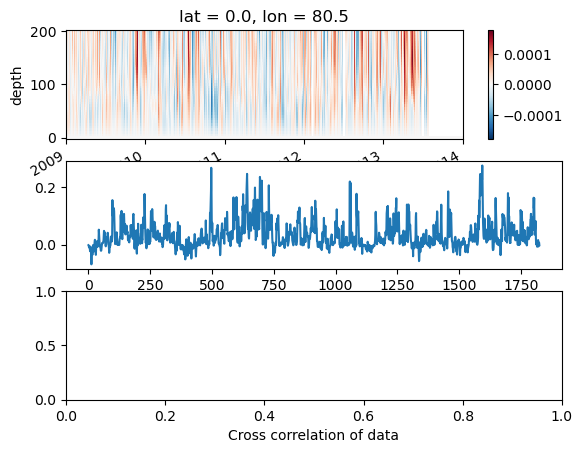

In [60]:

# corr, _ = stats.spearmanr(w_1, tau_x0)
total = sum(w_1_0)
av = total / len(w_1_0)
z = [i - av for i in w_1_0]

total1 = sum(tau_x0)
av1 = total1 / len(tau_x0)
z1 = [i - av1 for i in tau_x0]

fig = plt.figure()

# Search trend volume
ax1 = fig.add_subplot(311)
w_1_0.plot(x = 'time', y='depth', ax = ax1)
ax1.set_xlabel('date')

# Random: "search trend volume"
ax2 = fig.add_subplot(312)
ax2.plot(tau_x0)
ax2.set_xlabel('date')

# Is there a pattern in search trend for this keyword?
ax3 = fig.add_subplot(313)
ax3.set_xlabel('Cross correlation of data')
# ax3.xcorr(z, z1, usevlines=True, maxlags=None, normed=True, lw=2)
corr = signal.correlate2d(w_1_0, tau_x0, boundary='fill', mode='same')
ax3.plot(corr)
ax3.grid(True)
plt.ylim(-1, 1)

plt.tight_layout()

plt.show()

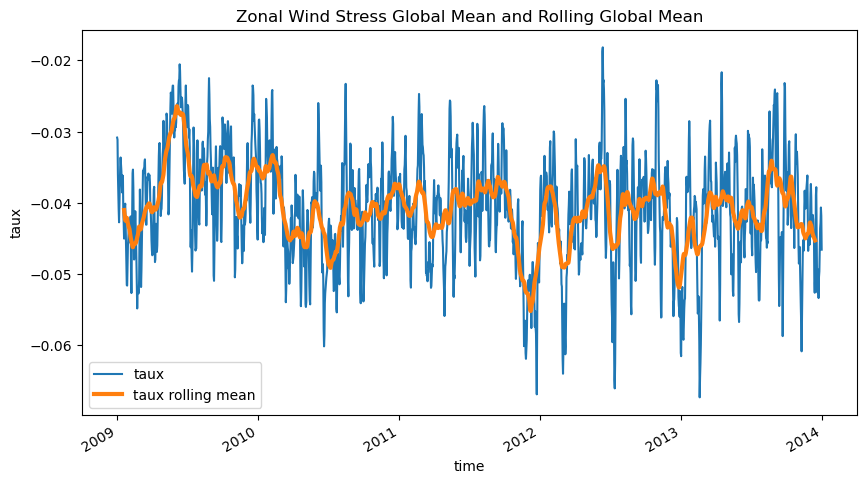

In [45]:
weights = np.cos(np.deg2rad(tauxd.latitude)); weights.name = 'weights'
taux_m = tau_x.weighted(weights).mean(dim = ['latitude', 'longitude'])

taux_m_r = taux_m.rolling(time = 36, center = True).mean()

plt.figure(figsize=(10,5))
taux_m.plot(label = 'taux')
taux_m_r.plot(label = 'taux rolling mean', lw = 3)
plt.title('Zonal Wind Stress Global Mean and Rolling Global Mean')
plt.legend()
# This shows global trend of mean easterly winds

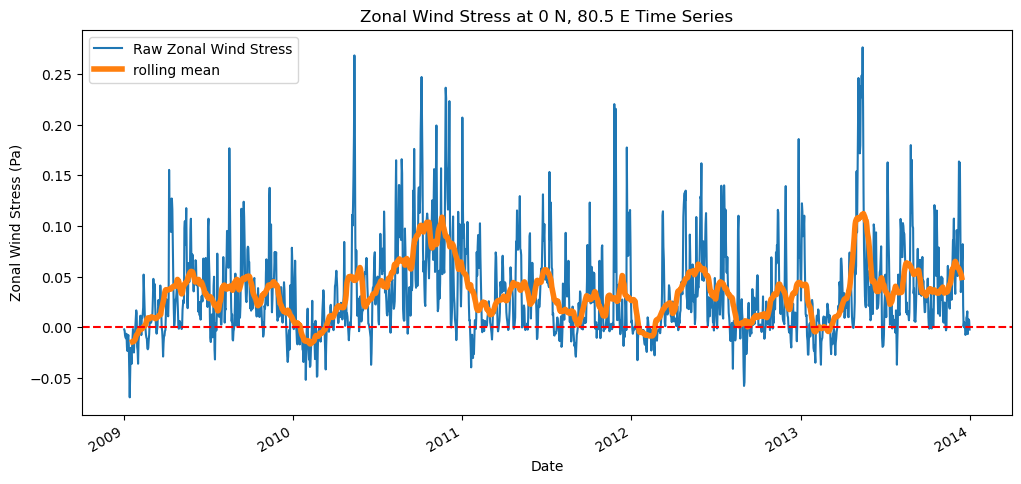

In [50]:
tau_x0_m_r = tau_x0.rolling(time = 36, center = True).mean() # smoothed over 36 days
plt.figure(figsize=(12, 5)) 
plt.plot(tau_x0['time'], tau_x0, label = 'Raw Zonal Wind Stress')
tau_x0_m_r.plot(label = 'rolling mean', lw = 4)
plt.axhline(y=0, color = 'r', ls = '--')
plt.xlabel('Date')
plt.ylabel('Zonal Wind Stress (Pa)')
plt.title('Zonal Wind Stress at 0 N, 80.5 E Time Series')
plt.legend()
# This shows difference from global trends above (mean westerly)

In [38]:
taux_clim = tauxd.groupby('time.month').mean('time')

In [39]:
tuax_a = tauxd.groupby("time.month")-taux_clim 